In [102]:
import torch
import torch.utils.data as data
import torchvision as tv
from torch.utils.data.dataloader import DataLoader
import pandas as pd
import numpy as np
import pickle
import os
from PIL import Image
from torchvision import transforms

min_batch = 64

In [103]:
data_dir='E:/2019~/데이터분석/스터디/고려대학교 딥러닝 스터디/3주차-PBL-data/'

In [104]:
with Image.open('E:/2019~/데이터분석/스터디/고려대학교 딥러닝 스터디/3주차-PBL-data/train/image_0.png') as image:
    img_array = np.array(image)

img_array.shape

(10, 300)

In [105]:
import pickle

### 피클 파일 불러오기 ###
with open("E:\\2019~\\데이터분석\\스터디\\고려대학교 딥러닝 스터디\\train.pkl","rb") as fr:
    train_data = pickle.load(fr)
    
train_data

,n,potential,position,img_path
0,5,0.226,"[81, 117, 150, 182, 218]",train/image_0.png
1,7,0.448,"[93, 114, 132, 150, 167, 185, 206]",train/image_1.png
2,5,0.341,"[97, 125, 150, 174, 202]",train/image_2.png
3,8,0.390,"[82, 104, 123, 141, 158, 176, 195, 217]",train/image_3.png
4,8,0.404,"[83, 105, 124, 141, 158, 175, 194, 216]",train/image_4.png
...,...,...,...,...
59995,6,0.369,"[92, 117, 139, 160, 182, 207]",train/image_59995.png
59996,8,0.320,"[72, 98, 119, 140, 159, 180, 201, 227]",train/image_59996.png
59997,8,0.266,"[62, 91, 115, 138, 161, 184, 208, 237]",train/image_59997.png
59998,8,0.337,"[75, 99, 120, 140, 159, 179, 200, 224]",train/image_59998.png


In [106]:
with open("E:\\2019~\\데이터분석\\스터디\\고려대학교 딥러닝 스터디\\valid.pkl","rb") as fr:
    valid_data = pickle.load(fr)

valid_data

,n,potential,position,img_path
0,6,0.457,"[100, 122, 140, 159, 177, 199]",valid/image_0.png
1,7,0.291,"[74, 102, 127, 150, 172, 197, 225]",valid/image_1.png
2,6,0.434,"[98, 121, 140, 159, 178, 201]",valid/image_2.png
3,8,0.435,"[86, 107, 125, 141, 158, 174, 192, 213]",valid/image_3.png
4,8,0.401,"[83, 105, 124, 141, 158, 175, 194, 216]",valid/image_4.png
...,...,...,...,...
9995,6,0.301,"[84, 113, 137, 162, 186, 215]",valid/image_9995.png
9996,8,0.345,"[76, 100, 121, 140, 159, 178, 199, 223]",valid/image_9996.png
9997,5,0.372,"[100, 126, 150, 173, 199]",valid/image_9997.png
9998,6,0.304,"[84, 113, 138, 161, 186, 215]",valid/image_9998.png


In [107]:
train_data['img_path']

0            train/image_0.png
1            train/image_1.png
2            train/image_2.png
3            train/image_3.png
4            train/image_4.png
                 ...          
59995    train/image_59995.png
59996    train/image_59996.png
59997    train/image_59997.png
59998    train/image_59998.png
59999    train/image_59999.png
Name: img_path, Length: 60000, dtype: object

In [108]:
train_data['img_path'].values

array(['train/image_0.png', 'train/image_1.png', 'train/image_2.png', ...,
       'train/image_59997.png', 'train/image_59998.png',
       'train/image_59999.png'], dtype=object)

In [109]:
np.array(train_data[['n','potential']])

array([[5.   , 0.226],
       [7.   , 0.448],
       [5.   , 0.341],
       ...,
       [8.   , 0.266],
       [8.   , 0.337],
       [6.   , 0.179]])

In [110]:
train_data[['n', 'potential']].values

array([[5.   , 0.226],
       [7.   , 0.448],
       [5.   , 0.341],
       ...,
       [8.   , 0.266],
       [8.   , 0.337],
       [6.   , 0.179]])

In [111]:
class custom_ION_train_dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, train=True, transform=None):
        
        self.data_dir = data_dir
        
        if train:
            self.input_path = train_data['img_path'].values
            self.target = np.array(train_data[['n','potential']])
        else:
            self.input_path = valid_data['img_path'].values
            self.target = np.array(valid_data[['n', 'potential']])

        if transform is None:
            self.transform = torch.Tensor
        else:
            self.transform = transform
        
    def __len__(self):
        return len(self.target)
    
    def __getitem__(self, index):
        
        input_file = Image.open(self.data_dir + self.input_path[index])
        self.input = np.array(input_file)
            
        img = self.transform(self.input)
        label = self.transform(self.target[index])
        
        return img, label


In [112]:
custom_train_data = custom_ION_train_dataset(data_dir, train=True)
custom_valid_data = custom_ION_train_dataset(data_dir, train=False)
    
train_loader = DataLoader(dataset=custom_train_data, batch_size=min_batch, shuffle=True)
valid_loader = DataLoader(dataset=custom_valid_data, batch_size=min_batch, shuffle=False)

In [113]:
x, y = next(iter(train_loader))

In [114]:
print(x.shape)
print(y.shape)

torch.Size([64, 10, 300])
torch.Size([64, 2])


In [68]:
x

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [115]:
y

tensor([[8.0000, 0.4690],
        [5.0000, 0.2340],
        [6.0000, 0.1870],
        [6.0000, 0.4560],
        [5.0000, 0.2600],
        [7.0000, 0.2380],
        [8.0000, 0.2510],
        [6.0000, 0.5170],
        [5.0000, 0.4710],
        [7.0000, 0.4890],
        [5.0000, 0.4920],
        [7.0000, 0.4910],
        [7.0000, 0.3280],
        [5.0000, 0.4830],
        [7.0000, 0.2750],
        [5.0000, 0.2100],
        [6.0000, 0.4930],
        [6.0000, 0.4250],
        [7.0000, 0.3120],
        [8.0000, 0.1850],
        [5.0000, 0.4690],
        [8.0000, 0.1710],
        [7.0000, 0.2410],
        [5.0000, 0.4750],
        [8.0000, 0.3280],
        [8.0000, 0.4900],
        [8.0000, 0.3110],
        [7.0000, 0.3660],
        [8.0000, 0.4750],
        [5.0000, 0.2990],
        [7.0000, 0.2300],
        [8.0000, 0.4130],
        [6.0000, 0.1570],
        [6.0000, 0.4220],
        [5.0000, 0.3580],
        [5.0000, 0.4070],
        [8.0000, 0.4620],
        [8.0000, 0.2760],
        [8.0

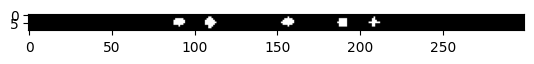

In [116]:
import matplotlib.pyplot as plt

plt.imshow(x[0], cmap='gray')
plt.show()

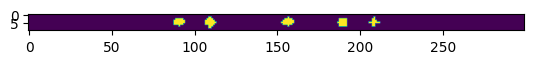

In [117]:
plt.imshow(x[0])
plt.show()

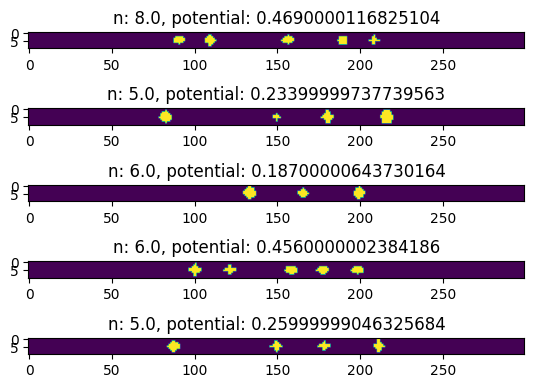

In [118]:
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(x[i])
    plt.title("n: {}, potential: {}".format(y[i][0], y[i][1]))